In [261]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge


# load in data set


In [262]:

data = pd.read_csv('airfoil_self_noise.txt', sep = '\t',)

cols = ['frequency','angle', 'chord length','velocity', 'displacement','sound pressure']

data.columns = cols

In [263]:
data.head()

,frequency,angle,chord length,velocity,displacement,sound pressure
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


In [264]:
desc = data.describe()

In [265]:
desc

,frequency,angle,chord length,velocity,displacement,sound pressure
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,2887.769640,6.786818,0.136436,50.847137,0.011146,124.835034
std,3153.162983,5.917509,0.093471,15.569029,0.013153,6.900864
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.190000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.719000
75%,4000.000000,9.900000,0.228600,71.300000,0.015840,129.997750
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [266]:
#desc.to_latex()

In [271]:
# original features

X0 = data[cols[0:-1]]
y = data[cols[-1]]
X_train0, X_test0, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# modified features
kin = 1.568e-5
x = data[cols[2]]*data[cols[3]]/kin
X_1 = pd.concat([x, data[cols[0]],data[cols[1]],data[cols[4]]], axis=1)
col_1 = ['Reynold Num','frequency','angle','displacement' ]
X_train1, X_test1, y_train, y_test = train_test_split(X_1, y, test_size=0.33, random_state=42)



# OLS Regression

In [15]:

def lin_reg(X, y, degree = 7):
    '''
    do OLS in 1st order to dth order polynormial fesatures
    output scores of testing set
    '''
    score = np.zeros(degree-1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    for i in range (1,degree):
        lr = LinearRegression()
        poly = PolynomialFeatures(i)
        Xtrain_poly = poly.fit_transform(X_train)
        lr.fit(Xtrain_poly,y_train)
        Xtest_poly = poly.fit_transform(X_test)
        score[i-1] = lr.score(Xtest_poly,y_test)
    return score

## fit data and plot testing score

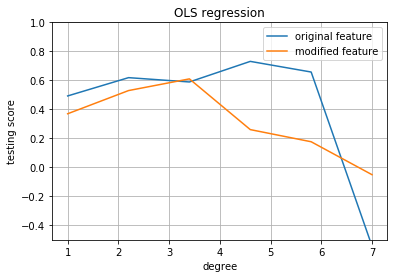

In [63]:
score0 = lin_reg(X,y)
score1 = lin_reg(X_1,y)
plt.plot(np.linspace(1,7,6),score0, label = 'original feature')
plt.plot(np.linspace(1,7,6),score1, label = 'modified feature')
plt.xlabel('degree')
plt.ylabel('testing score')
plt.title('OLS regression')
plt.grid('on')
plt.ylim(-0.5,1)
plt.legend()
plt.savefig('OSL.png')

In [184]:
score0


array([ 0.4924224 ,  0.61859963,  0.58883393,  0.7308119 ,  0.65737251,
       -0.54364277])

In [185]:
score1

array([ 0.36951673,  0.52946306,  0.61006016,  0.26014166,  0.17640858,
       -0.05092559])

# Ridge Regression

In [45]:
def ridge_reg(X, y, degree = 7):
    '''
    do ridge in 1st order to dth order polynormial fesatures
    do cv to find best panalizing parameters
    output scores of testing set
    '''
    score = np.zeros(degree-1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    for i in range (1,degree):
        RidgeR = Ridge()
        poly = PolynomialFeatures(i)
        Xtrain_poly = poly.fit_transform(X_train)
        clf0 = GridSearchCV(RidgeR,{'alpha':[0,0.0000001,0.00001,0.0001,0.001,0.01,0.1,1,10]})
        clf0.fit(Xtrain_poly,y_train)

        Xtest_poly = poly.fit_transform(X_test)
        y_pred = clf0.best_estimator_.predict(Xtest_poly)
        score[i-1] =r2_score(y_test,y_pred)

    return score

In [46]:
rid0 = ridge_reg(X,y)
rid1 = ridge_reg(X_1,y)


C:\Users\foy_f\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.7477528331649815e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\foy_f\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.285965177021309e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\foy_f\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.2504993523609661e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\foy_f\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

C:\Users\foy_f\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.6680580434035747e-24
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\foy_f\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.290711403283547e-22
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\foy_f\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.55218915135245e-21
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\foy_f\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. R

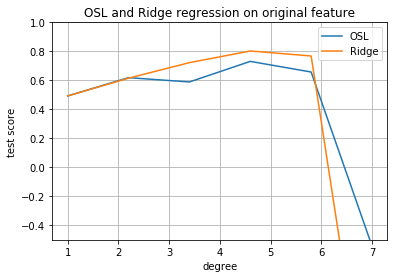

In [62]:
plt.plot(np.linspace(1,7,6),score0, label = 'OSL')
plt.plot(np.linspace(1,7,6),rid0, label = 'Ridge')
plt.xlabel('degree')
plt.ylabel('test score')
plt.title('OSL and Ridge regression on original feature')
plt.grid('on')
plt.ylim(-0.5,1)
plt.legend()
plt.savefig('rid0.png')

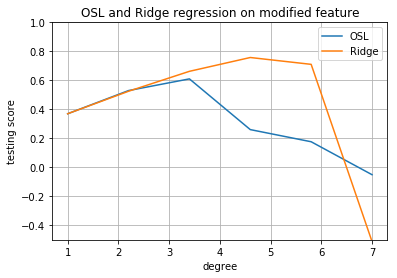

In [61]:
plt.plot(np.linspace(1,7,6),score1, label = 'OSL')
plt.plot(np.linspace(1,7,6),rid1, label = 'Ridge')
plt.xlabel('degree')
plt.ylabel('testing score')
plt.title('OSL and Ridge regression on modified feature')
plt.grid('on')
plt.ylim(-0.5,1)
plt.legend()
plt.savefig('rid1.png')

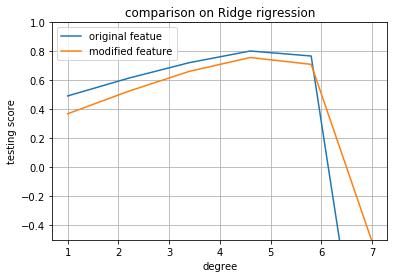

In [60]:
plt.plot(np.linspace(1,7,6),rid0, label = 'original featue')
plt.plot(np.linspace(1,7,6),rid1, label = 'modified feature')
plt.xlabel('degree')
plt.ylabel('testing score')
plt.title('comparison on Ridge rigression')
plt.ylim(-0.5,1)
plt.grid('on')
plt.legend()
plt.savefig('rid.png')

In [58]:
rid0

array([ 0.4924331 ,  0.61480907,  0.72212449,  0.80247892,  0.76792545,
       -1.95866101])

In [186]:
rid1

array([ 0.36955316,  0.52480903,  0.66220289,  0.75751596,  0.71032707,
       -0.51204224])

# Regression Tree

In [89]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [196]:
#define tree regressor
Tree = tree.DecisionTreeRegressor()

# original features
clf = GridSearchCV(Tree,{'max_depth':np.linspace(3,300,28)})
clf.fit(X_train0, y_train)
y_pred = clf.best_estimator_.predict(X_test0)
tree0=r2_score(y_test,y_pred)

# modified features
clf2 = GridSearchCV(Tree,{'max_depth':np.linspace(3,300,28)})
clf2.fit(X_train1, y_train)
y_pred = clf2.predict(X_test1)
tree1=r2_score(y_test,y_pred)



## report result

In [197]:
tree0

0.8618712939465165

In [198]:
tree1

0.840306132626735

In [242]:
def plot_grid_search1D(cv_results0,cv_results1, grid_param, name_param,name_file):
    # Get Test Scores Mean and std for each grid search
    scores_mean0 = cv_results0['mean_test_score']
    scores_mean = np.array(scores_mean0)
    scores_mean1 = cv_results1['mean_test_score']
    scores_mean = np.array(scores_mean1)

    scores_sd = cv_results0['std_test_score']
    scores_sd = np.array(scores_sd)


    
    plt.plot(grid_param, scores_mean0,label = "original features")
    plt.plot(grid_param, scores_mean1, label = "modified features")
    

    plt.title("", fontsize=20, fontweight='bold')
    plt.xlabel(name_param, fontsize=16)
    plt.ylabel('CV Average Score', fontsize=16)
    plt.grid('on')
    plt.legend()
   # plt.ylim(0.3,1)
    plt.savefig("%s.png"%name_file)



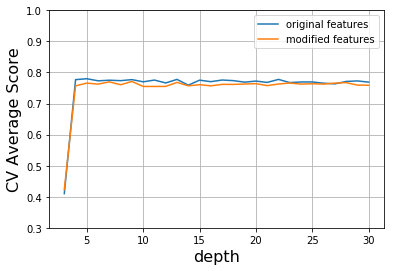

In [200]:
plot_grid_search1D(clf.cv_results_,clf2.cv_results_,np.linspace(3,30,28),'depth',"Tree")

## plot the actual tree

In [88]:
import graphviz 
import io
import sklearn.model_selection
import sklearn.tree
import numpy as np
import scipy.io
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\foy_f\Anaconda3\Library\bin\graphviz'

import pydot

Tree4 = tree.DecisionTreeRegressor(max_depth=3)

Tree4.fit(X_train1, y_train)
out = io.StringIO()
sklearn.tree.export_graphviz(
    Tree4, out_file=out, feature_names=col_1, rounded = True, precision = 0)
graph = pydot.graph_from_dot_data(out.getvalue())
pydot.graph_from_dot_data(out.getvalue())[0].write_pdf("tree00.pdf")


# Random Forest

In [115]:
# original data
clf_rf0 = GridSearchCV(RandomForestRegressor(),{ 'n_estimators':[100,150,170,200,220,250,300,400], 'max_features':[2,3,4]} )
clf_rf0.fit(X_train0,y_train)
y_pred = clf_rf0.predict(X_test0)
r2_score(y_test,y_pred)

0.9338759077607818

In [117]:
# modofied data
clf_rf1 = GridSearchCV(RandomForestRegressor(),{ 'n_estimators':[100,150,170,200,220,250,300,400], 'max_features':[2,3,4]} )
clf_rf1.fit(X_train1,y_train)
y_pred = clf_rf1.predict(X_test1)
r2_score(y_test,y_pred)

0.9142052442838186

## feature importance

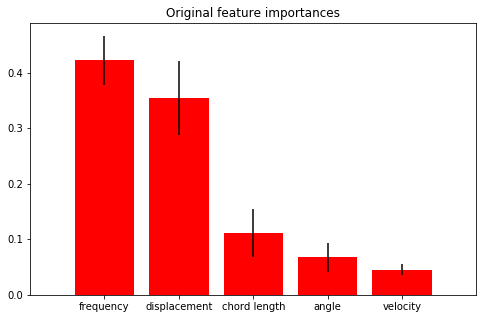

In [140]:
importances = clf_rf0.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf0.best_estimator_],axis=0)
indices = np.argsort(importances)[::-1]
features_sorted = [cols[i] for i in indices]

plt.figure(figsize = (8,5))
plt.title('Original feature importances')
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), features_sorted)
plt.xlim([-1, X.shape[1]])
plt.savefig('feat_imp0.png')

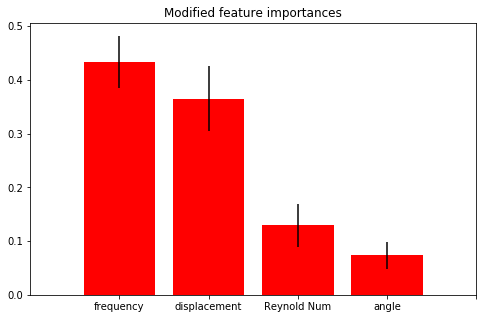

In [141]:
importances = clf_rf1.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf1.best_estimator_],axis=0)
indices = np.argsort(importances)[::-1]
features_sorted1 = [col_1[i] for i in indices]

plt.figure(figsize = (8,5))
plt.title("Modified feature importances")
plt.bar(range(X_test1.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), features_sorted1)
plt.xlim([-1, X_test1.shape[1]])
plt.savefig('fea_imp2.png')

## report cv result

In [177]:
def plot_grid_search2D(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2,name_file):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], label= name_param_2 + ': ' + str(val))

    ax.set_title("Ramdom forest CV", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
#    ax.set_ylim(0.78,0.9)
    ax.grid('on')
    plt.savefig('%s.png'%name_file)

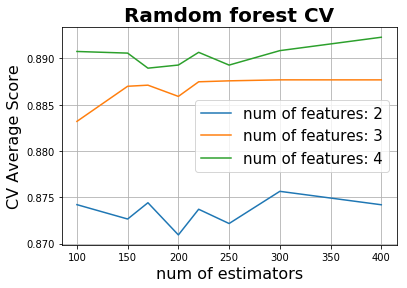

In [178]:
plot_grid_search2D(clf_rf0.cv_results_,[100,150,170,200,220,250,300,400],[2,3,4],"num of estimators","num of features","RFcv0" )

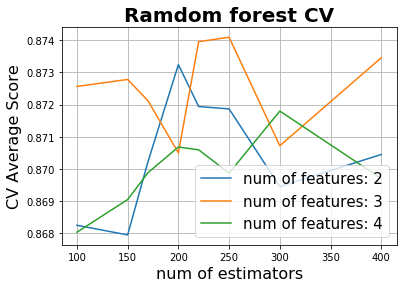

In [179]:
plot_grid_search2D(clf_rf1.cv_results_,[100,150,170,200,220,250,300,400],[2,3,4],"num of estimators","num of features","RFcv1" )

# AdaBoost

In [98]:
# original data
AdaB = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12),random_state=42)
clf3 = GridSearchCV(
    AdaB,{'n_estimators':[100,150,170,200,220,250,300,400]})
clf3.fit(X_train, y_train)
y_pred = clf3.best_estimator_.predict(X_test)
r2_score(y_test,y_pred)


0.9153874405920491

In [96]:
# modofied data
AdaB = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12),random_state=42)
clf4 = GridSearchCV(
    AdaB,{'n_estimators':[100,150,170,200,220,250,300,400]})
clf4.fit(X_train1, y_train)
y_pred = clf4.best_estimator_.predict(X_test1)
r2_score(y_test,y_pred)


0.9029442342779512

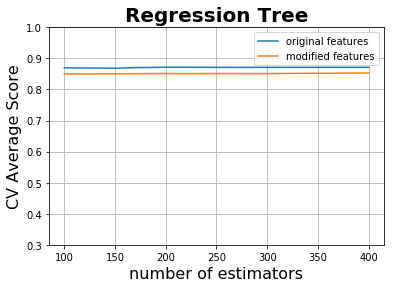

In [180]:
plot_grid_search1D(clf3.cv_results_,clf4.cv_results_,[100,150,170,200,220,250,300,400],'number of estimators',"Ada")


# Bagging

In [223]:

from sklearn.ensemble import BaggingRegressor

# original data
Bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=12),random_state=42)
clf_bag = GridSearchCV(
    Bag,{'n_estimators':[100,150,170,200,220,250,300,400]})
clf_bag.fit(X_train, y_train)
y_pred = clf_bag.best_estimator_.predict(X_test)
r2_score(y_test,y_pred)


0.9312735940423511

In [225]:
# original data
Bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=12),random_state=42)
clf_bag2 = GridSearchCV(
    Bag,{'n_estimators':[100,150,170,200,220,250,300,400]})
clf_bag2.fit(X_train1, y_train)
y_pred = clf_bag2.best_estimator_.predict(X_test1)
r2_score(y_test,y_pred)

0.9073018759023807

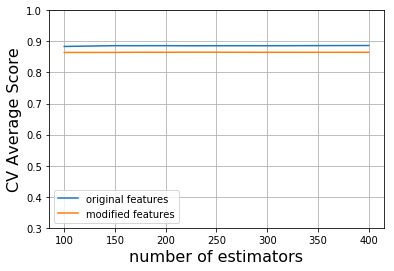

In [230]:
plot_grid_search1D(clf_bag.cv_results_,clf_bag2.cv_results_,[100,150,170,200,220,250,300,400],'number of estimators',"bag")


In [239]:
# original data
Bag = BaggingRegressor(base_estimator=neighbors.KNeighborsRegressor(),random_state=42)
clf_bag = GridSearchCV(
    Bag,{'n_estimators':[100,150,170,200,220,250,300,400]})
clf_bag.fit(X_train, y_train)
y_pred = clf_bag.best_estimator_.predict(X_test)
r2_score(y_test,y_pred)

0.17785830598909014

In [240]:
# original data
Bag = BaggingRegressor(base_estimator=neighbors.KNeighborsRegressor(),random_state=42)
clf_bag2 = GridSearchCV(
    Bag,{'n_estimators':[100,150,170,200,220,250,300,400]})
clf_bag2.fit(X_train1, y_train)
y_pred = clf_bag2.best_estimator_.predict(X_test1)
r2_score(y_test,y_pred)

0.43576069929222794

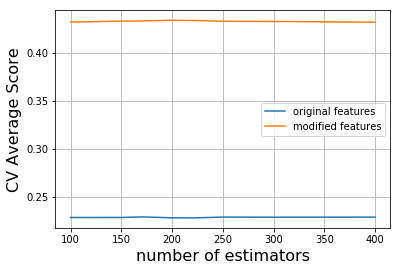

In [244]:
plot_grid_search1D(clf_bag.cv_results_,clf_bag2.cv_results_,[100,150,170,200,220,250,300,400],'number of estimators',"bag-knn")


# KNN Regeression

In [218]:
from sklearn import neighbors

# original data
knn = neighbors.KNeighborsRegressor()
clf_knn = GridSearchCV(
    knn,{'n_neighbors':np.arange(1,19)})
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.best_estimator_.predict(X_test)
r2_score(y_test,y_pred)


0.216628272491454

In [219]:
# modified data
knn = neighbors.KNeighborsRegressor()
clf_knn2 = GridSearchCV(knn,{'n_neighbors': np.arange(1,19)})
clf_knn2.fit(X_train1, y_train)
y_pred = clf_knn2.best_estimator_.predict(X_test1)
r2_score(y_test,y_pred)

0.4222694550197005

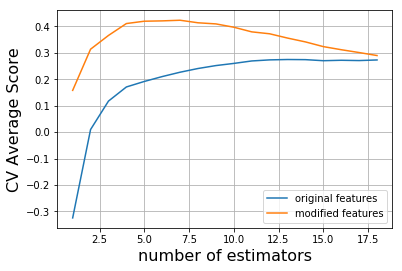

In [222]:
plot_grid_search1D(clf_knn.cv_results_,clf_knn2.cv_results_,np.arange(1,19),'number of estimators',"knn")


In [277]:
X_train5 = X_train0.copy()
X_train5["displacement"] = 10000 * X_train5["displacement"]
X_test5 = X_test0.copy()
X_test5["displacement"] = 10000 * X_test5["displacement"]

In [278]:
# modified data
knn = neighbors.KNeighborsRegressor()
clf_knn2 = GridSearchCV(knn,{'n_neighbors': np.arange(1,19)})
clf_knn2.fit(X_train5, y_train)
y_pred = clf_knn2.best_estimator_.predict(X_test5)
r2_score(y_test,y_pred)

0.6150429378908566